Copyright (c) Microsoft Corporation. All rights reserved. Licensed under the MIT License.

# Randomly generated CyberBattle network environment (experimental)

In [5]:
import numpy as np
import cyberbattle.simulation.model as model
import cyberbattle.agents.random_agent as random_agent
from cyberbattle.simulation.model import *
from typing import List
import cyberbattle.simulation.generate_network as g
%matplotlib inline 

In [6]:
traffic = g.generate_random_traffic_network(
    seed=1, n_clients=50, 
    n_servers={
                "SMB": 15,
                "HTTP": 15,
                "RDP": 15,
            },
    alpha=np.array([(1, 1), (0.2, 0.5)], dtype=float),
    beta=np.array([(1000, 10), (10, 100)], dtype=float),
)

In [7]:
network=g.cyberbattle_model_from_traffic_graph(traffic)

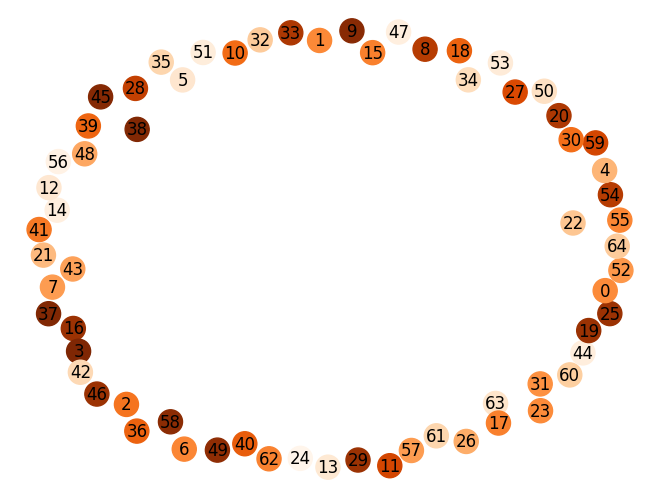

In [8]:
env = model.Environment(network=network, vulnerability_library=dict([]), identifiers=g.ENV_IDENTIFIERS)
env.plot_environment_graph()

In [9]:
network.nodes

NodeView(('2', '53', '5', '50', '6', '51', '7', '52', '61', '8', '56', '59', '10', '14', '60', '62', '12', '58', '13', '57', '15', '16', '63', '21', '22', '55', '23', '28', '24', '25', '27', '30', '31', '32', '33', '34', '35', '38', '40', '64', '41', '43', '44', '54', '45', '47', '49', '4', '39', '18', '26', '36', '37', '0', '1', '3', '9', '11', '17', '19', '20', '29', '42', '46', '48'))

In [10]:
def ports_from_vuln(vuln: model.VulnerabilityInfo) -> List[model.PortName]:
    if isinstance(vuln.outcome, model.LeakedCredentials):
        return [c.port for c in vuln.outcome.credentials]
    else:
        return []   

In [11]:
all_existing_ports = set({port
                                  for _, v in env.vulnerability_library.items()
                                  for port in ports_from_vuln(v)}).union(
            {port
             for _, node_info in env.nodes()
             for _, v in node_info.vulnerabilities.items()
             for port in ports_from_vuln(v)}).union(
            {service.name
             for _, node_info in env.nodes()
             for service in node_info.services})

In [12]:
all_existing_ports

{'RDP', 'SMB'}

In [13]:
[ node_info.services for _, node_info in env.nodes()]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [ListeningService(name='RDP', allowedCredentials=['unique_pwd3'], running=True)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [ListeningService(name='SMB', allowedCredentials=['unique_pwd4'], running=True)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [ListeningService(name='RDP', allowedCredentials=['unique_pwd1', 'unique_pwd47'], running=True)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [14]:
#import sys, logging
#logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(levelname)s: %(message)s")
import gym
import cyberbattle._env.cyberbattle_env as cyberbattle_env

In [15]:
gym_env = gym.make('CyberBattleRandom-v0')

+ rewarded action: {'local_vulnerability': array([0, 0], dtype=int32)} total_reward=13.0 reward=13.0 @t=0
  local_vulnerability(`40, ScanWindowsCredentialManagerForRDP)


status     properties  \
id                              
40       owned  [breach_node]   
50  discovered            NaN   

                                        local_attacks remote_attacks  
id                                                                    
40  [ScanWindowsCredentialManagerForSMB, ScanWindo...   [Traceroute]  
50                                               None             []

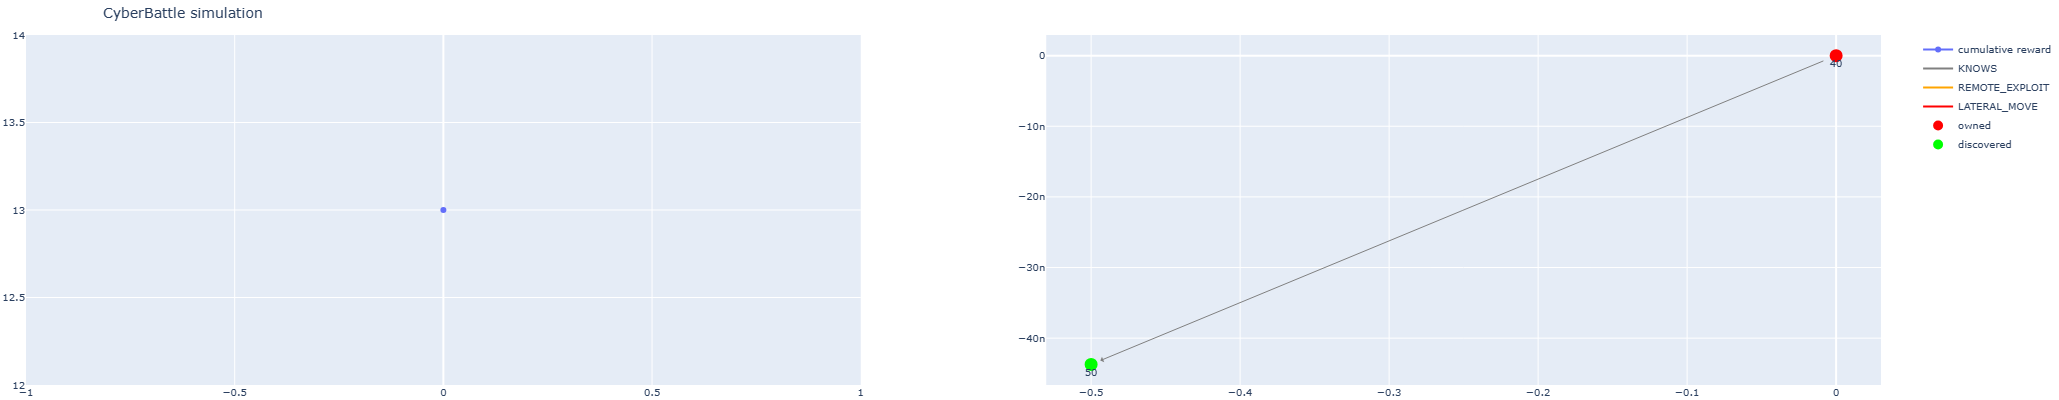

+ rewarded action: {'local_vulnerability': array([0, 1], dtype=int32)} total_reward=29.0 reward=16.0 @t=3
  local_vulnerability(`40, ScanWindowsExplorerRecentFiles)


status     properties  \
id                              
40       owned  [breach_node]   
50  discovered            NaN   
30  discovered            NaN   
53  discovered            NaN   

                                        local_attacks remote_attacks  
id                                                                    
40  [ScanWindowsCredentialManagerForSMB, ScanWindo...   [Traceroute]  
50                                               None             []  
30                                               None             []  
53                                               None             []

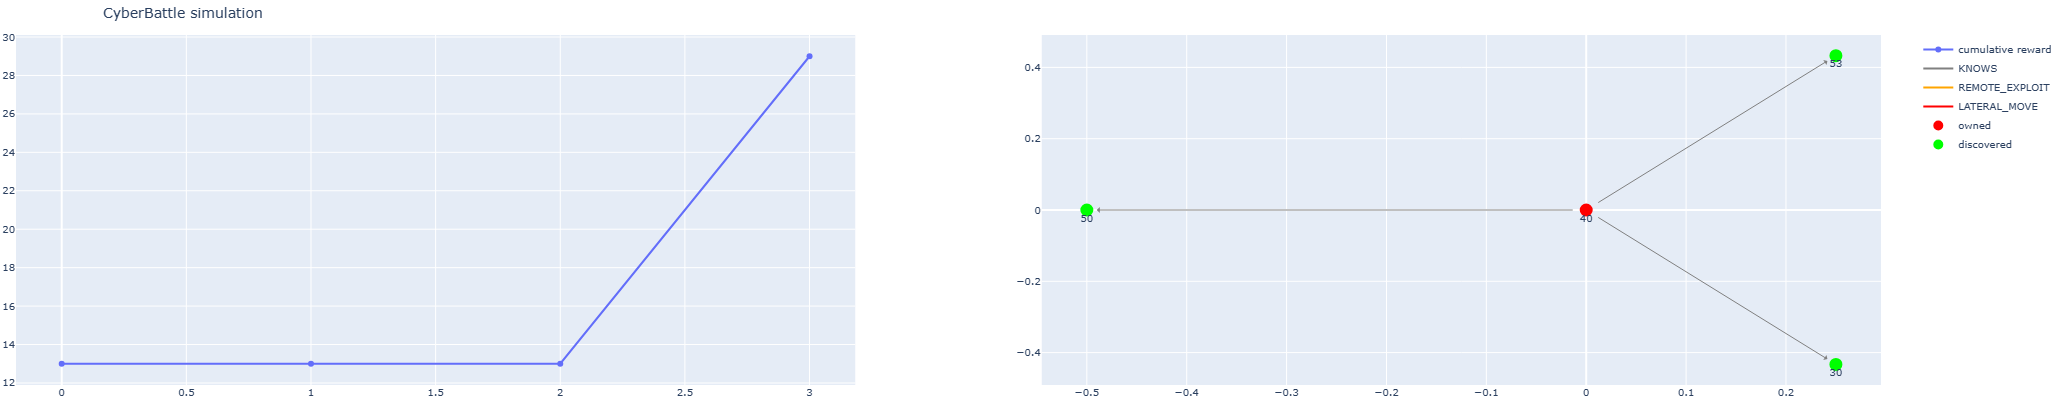

+ rewarded action: {'local_vulnerability': array([0, 2], dtype=int32)} total_reward=40.0 reward=11.0 @t=6
  local_vulnerability(`40, ScanWindowsCredentialManagerForSMB)


status     properties  \
id                              
40       owned  [breach_node]   
50  discovered            NaN   
30  discovered            NaN   
53  discovered            NaN   

                                        local_attacks remote_attacks  
id                                                                    
40  [ScanWindowsCredentialManagerForSMB, ScanWindo...   [Traceroute]  
50                                               None             []  
30                                               None             []  
53                                               None             []

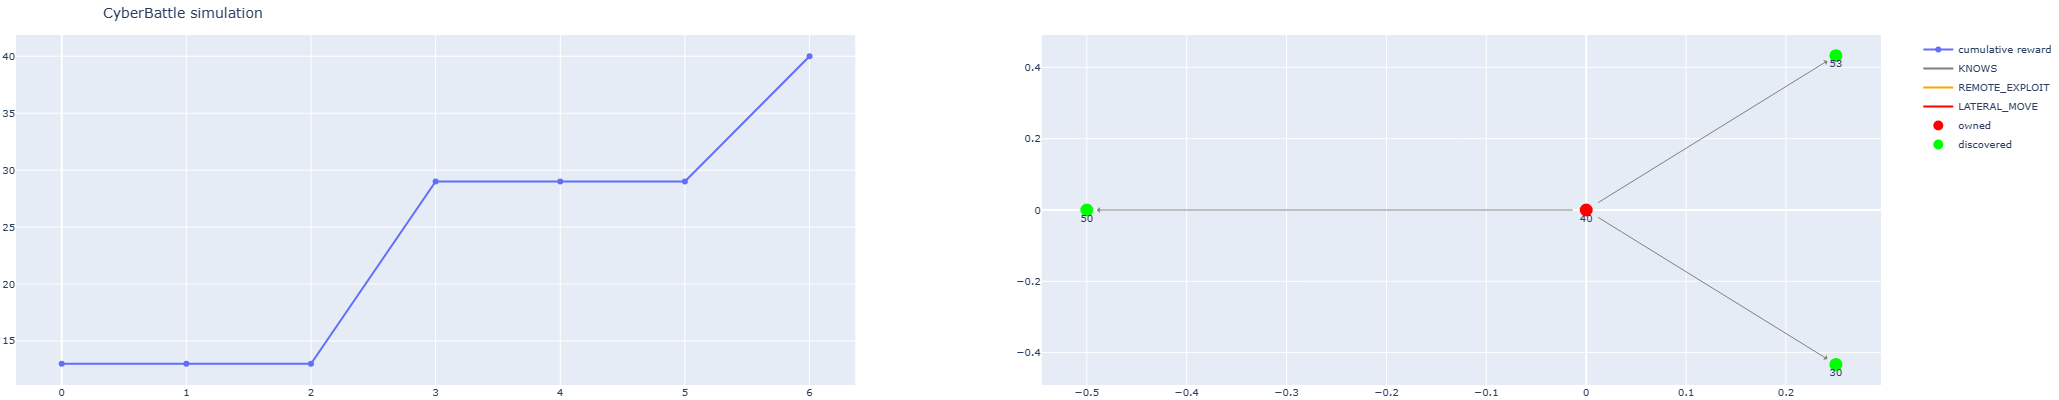

+ rewarded action: {'remote_vulnerability': array([0, 0, 0], dtype=int32)} total_reward=42.0 reward=2.0 @t=16
  remote_vulnerability(`40, `40, Traceroute)


status     properties  \
id                              
40       owned  [breach_node]   
50  discovered            NaN   
30  discovered            NaN   
53  discovered            NaN   

                                        local_attacks remote_attacks  
id                                                                    
40  [ScanWindowsCredentialManagerForSMB, ScanWindo...   [Traceroute]  
50                                               None             []  
30                                               None             []  
53                                               None             []

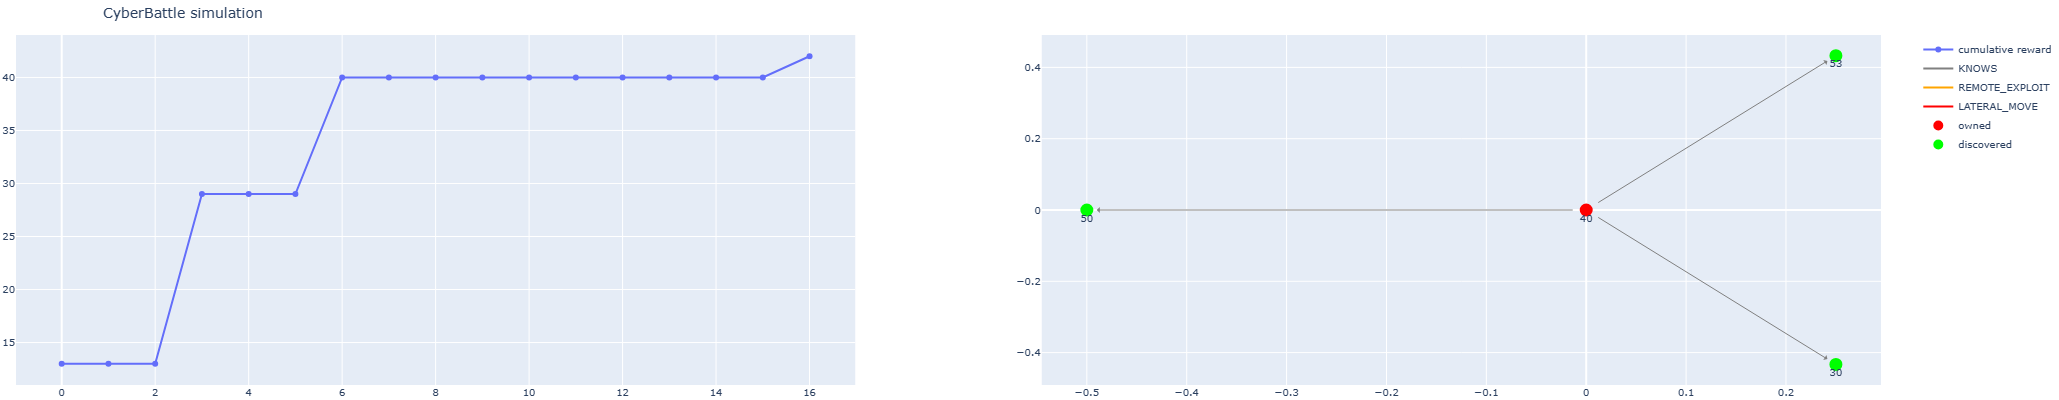

+ rewarded action: {'connect': array([0, 1, 2, 0], dtype=int32)} total_reward=119.0 reward=77.0 @t=22
  connect(`40, `50, RDP, unique_pwd1)


status     properties  \
id                              
40       owned  [breach_node]   
50       owned             []   
30  discovered            NaN   
53  discovered            NaN   

                                        local_attacks remote_attacks  
id                                                                    
40  [ScanWindowsCredentialManagerForSMB, ScanWindo...   [Traceroute]  
50               [ScanWindowsCredentialManagerForRDP]             []  
30                                               None             []  
53                                               None             []

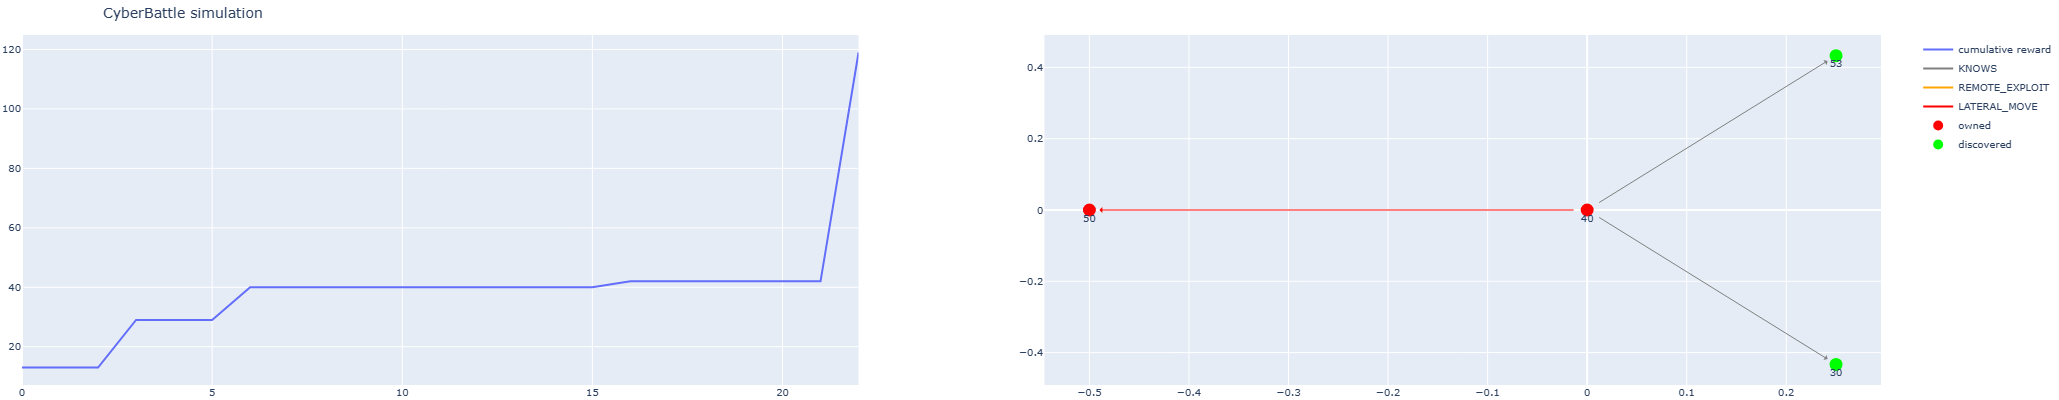

+ rewarded action: {'local_vulnerability': array([1, 0], dtype=int32)} total_reward=132.0 reward=13.0 @t=32
  local_vulnerability(`50, ScanWindowsCredentialManagerForRDP)


status     properties  \
id                              
40       owned  [breach_node]   
50       owned             []   
30  discovered            NaN   
53  discovered            NaN   
55  discovered            NaN   

                                        local_attacks remote_attacks  
id                                                                    
40  [ScanWindowsCredentialManagerForSMB, ScanWindo...   [Traceroute]  
50               [ScanWindowsCredentialManagerForRDP]             []  
30                                               None             []  
53                                               None             []  
55                                               None             []

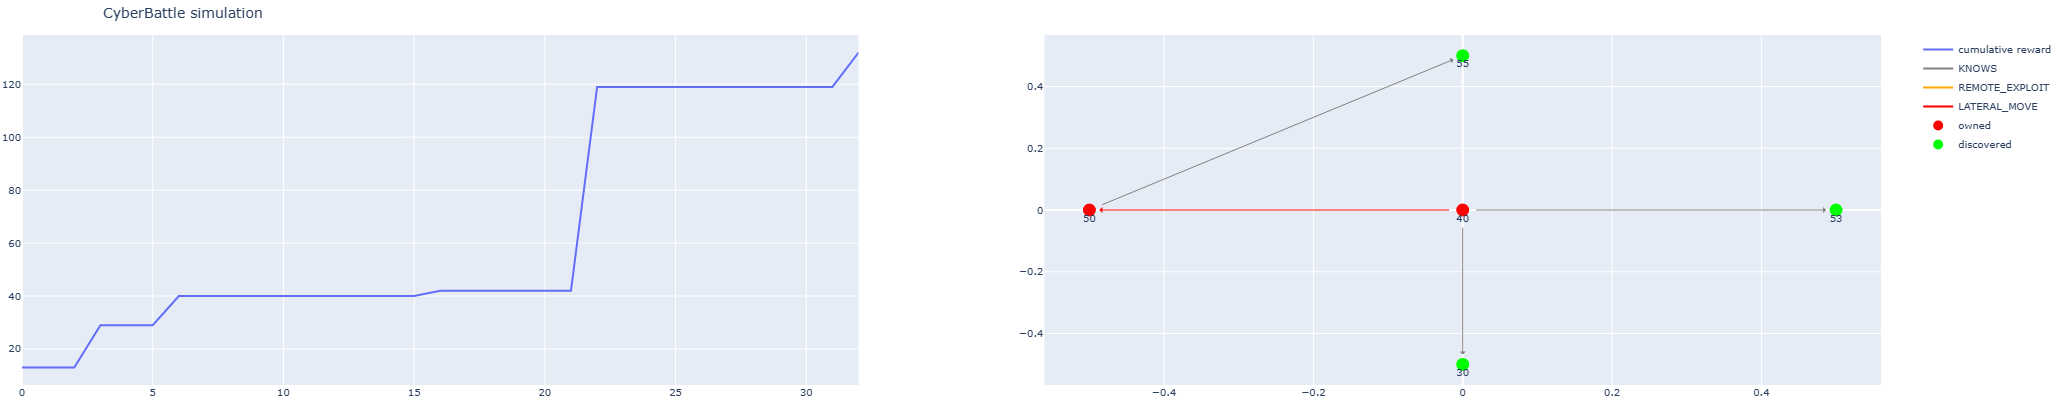

+ rewarded action: {'connect': array([1, 2, 0, 1], dtype=int32)} total_reward=181.0 reward=49.0 @t=336
  connect(`50, `30, SMB, unique_pwd2)


status     properties  \
id                              
40       owned  [breach_node]   
50       owned             []   
30       owned             []   
53  discovered            NaN   
55  discovered            NaN   

                                        local_attacks remote_attacks  
id                                                                    
40  [ScanWindowsCredentialManagerForSMB, ScanWindo...   [Traceroute]  
50               [ScanWindowsCredentialManagerForRDP]             []  
30                                                 []             []  
53                                               None             []  
55                                               None             []

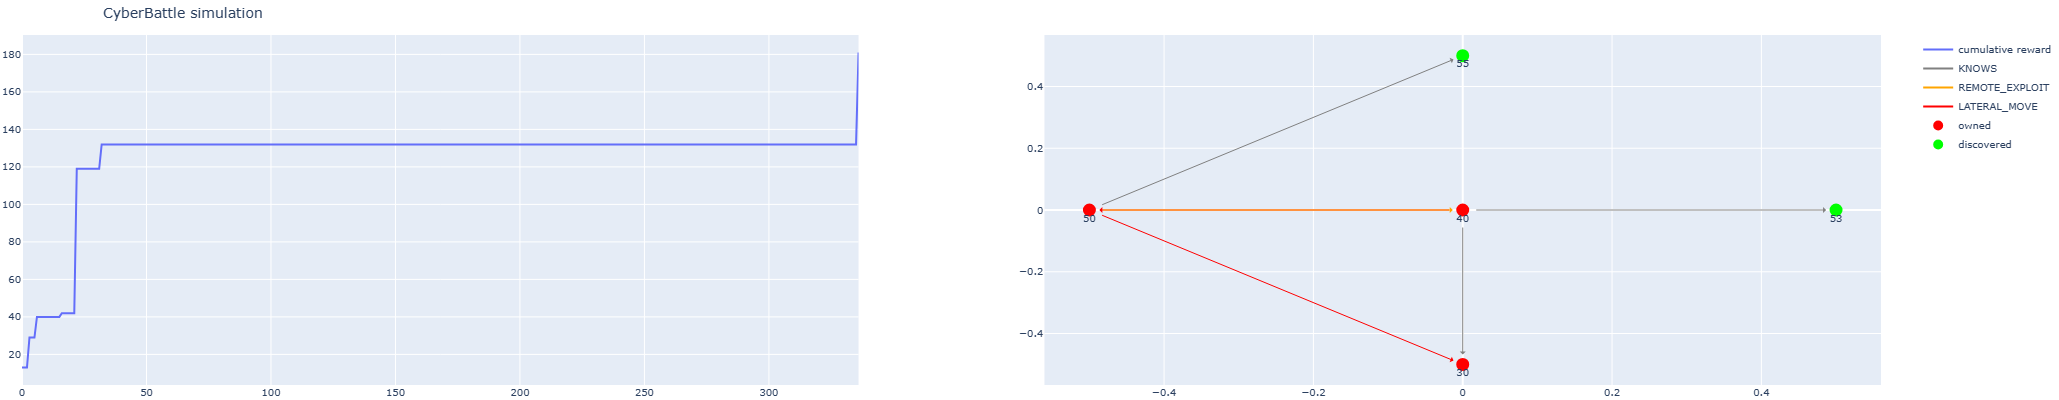

+ rewarded action: {'connect': array([0, 3, 0, 2], dtype=int32)} total_reward=234.0 reward=53.0 @t=406
  connect(`40, `53, SMB, unique_pwd3)


status     properties  \
id                              
40       owned  [breach_node]   
50       owned             []   
30       owned             []   
53       owned             []   
55  discovered            NaN   

                                        local_attacks remote_attacks  
id                                                                    
40  [ScanWindowsCredentialManagerForSMB, ScanWindo...   [Traceroute]  
50               [ScanWindowsCredentialManagerForRDP]             []  
30                                                 []             []  
53                                                 []             []  
55                                               None             []

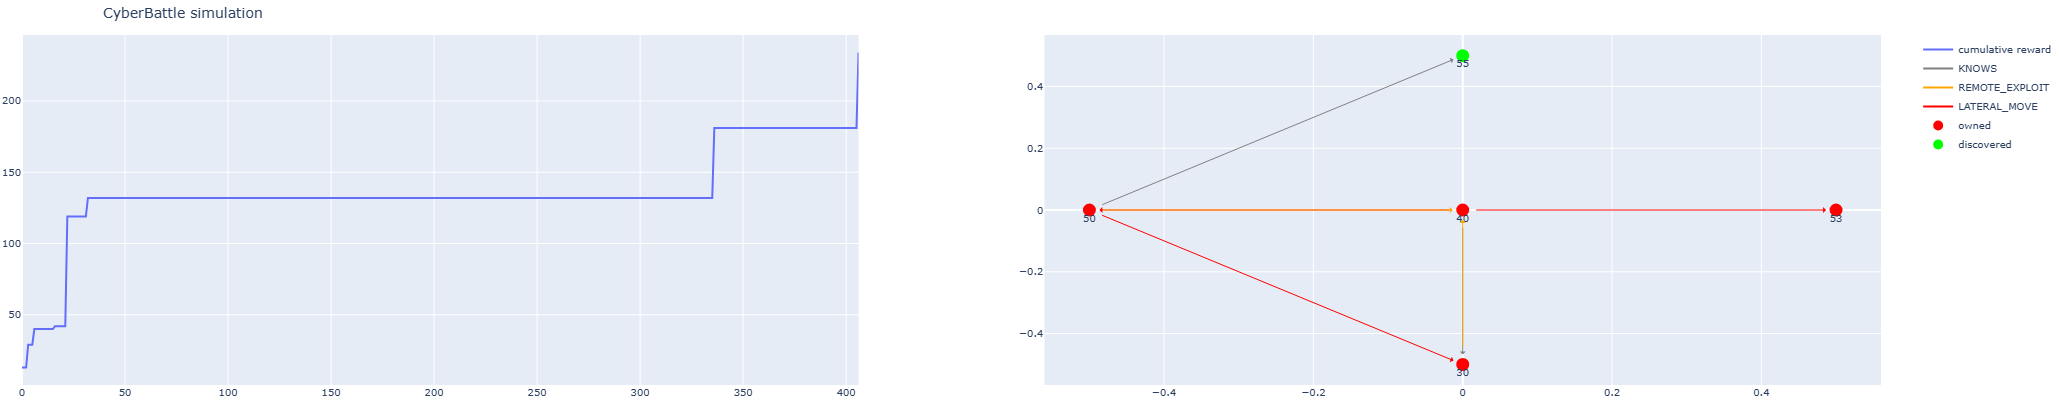

status     properties  \
id                              
40       owned  [breach_node]   
50       owned             []   
30       owned             []   
53       owned             []   
55  discovered            NaN   

                                        local_attacks remote_attacks  
id                                                                    
40  [ScanWindowsCredentialManagerForSMB, ScanWindo...   [Traceroute]  
50               [ScanWindowsCredentialManagerForRDP]             []  
30                                                 []             []  
53                                                 []             []  
55                                               None             []

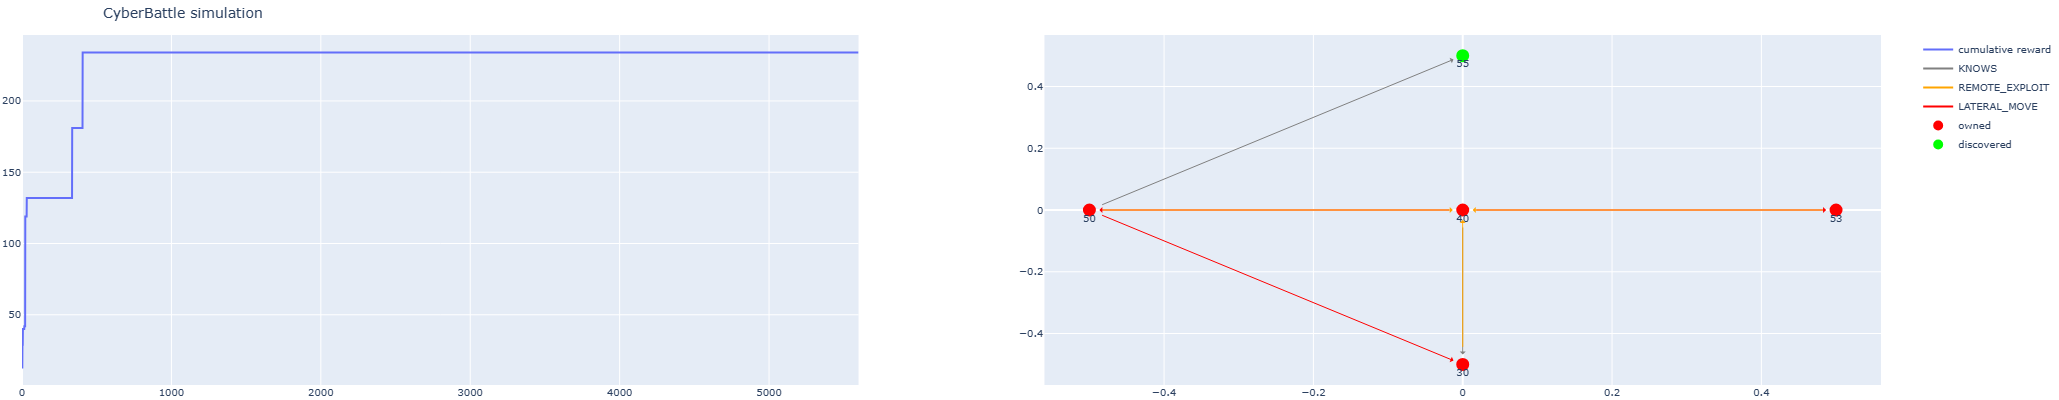

simulation ended


In [16]:
random_agent.run_random_agent(1, 5600, gym_env)